In [16]:
#@title Import Library Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Library Machine Learning (Scikit-Learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Import Library Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Setup visualisasi
sns.set_style('whitegrid')
print("Library berhasil di-import!")

Library berhasil di-import!


In [17]:
#@title Membaca dataset

df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Menampilkan data awal
print("Data Awal:")
display(df.head())
print("\nInfo Awal:")
print(df.info())

Data Awal:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk



Info Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [18]:
#@title Data Cleansing

# 1. Hapus Duplikat
print(f"Jumlah baris awal: {df.shape[0]}")
df_clean = df.drop_duplicates()
print(f"Jumlah baris setelah hapus duplikat: {df_clean.shape[0]}")

# 2. Hapus Noise
noise_condition = df_clean['HeartRate'] < 40
jumlah_noise = noise_condition.sum()
if jumlah_noise > 0:
    print(f"Menghapus {jumlah_noise} data noise pada HeartRate (< 40 bpm).")
    df_clean = df_clean[~noise_condition]

# Reset index
df_clean = df_clean.reset_index(drop=True)
print(f"Total data bersih siap pakai: {df_clean.shape[0]}")

Jumlah baris awal: 1014
Jumlah baris setelah hapus duplikat: 452
Menghapus 1 data noise pada HeartRate (< 40 bpm).
Total data bersih siap pakai: 451


In [19]:
#@title Preprocessing & Splitting

# 1. Encoding Target (Low Risk -> 0, Mid Risk -> 1, High Risk -> 2)
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df_clean['RiskLevel_Encoded'] = df_clean['RiskLevel'].map(risk_mapping)

# Pisah Fitur (X) dan Target (y)
X = df_clean.drop(['RiskLevel', 'RiskLevel_Encoded'], axis=1) # Fitur
y = df_clean['RiskLevel_Encoded'] # Target

# 2. Splitting Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Jumlah Data Train: {X_train.shape[0]}")
print(f"Jumlah Data Test: {X_test.shape[0]}")

Jumlah Data Train: 360
Jumlah Data Test: 91


In [20]:
#@title Scaling (Standarisasi)

# Inisialisasi Scaler
scaler = StandardScaler()

# Fit pada training data, transform ke train dan test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
print("Contoh data setelah di-scaling:")
display(X_train_final.head(3))

Contoh data setelah di-scaling:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-1.038476,0.520478,0.326339,-0.236002,-0.488811,-0.585780
1,0.422452,1.636783,1.765189,-0.304841,-0.488811,-1.119993
2,0.787684,1.636783,1.765189,3.309197,-0.488811,0.349094


In [21]:
#@title Model 1 - Logistic Regression

from sklearn.linear_model import LogisticRegression

# 1. Buat Model
model_logreg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# 2. Latih Model
model_logreg.fit(X_train_scaled, y_train)

# 3. Prediksi
y_pred_logreg = model_logreg.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, y_pred_logreg)

print(f"Akurasi Logistic Regression: {acc_logreg:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

Akurasi Logistic Regression: 0.6044

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.74        47
           1       0.30      0.43      0.35        21
           2       0.67      0.61      0.64        23

    accuracy                           0.60        91
   macro avg       0.59      0.57      0.57        91
weighted avg       0.65      0.60      0.62        91



Akurasi Random Forest: 0.6484

Classification Report :
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        47
           1       0.23      0.14      0.18        21
           2       0.71      0.74      0.72        23

    accuracy                           0.65        91
   macro avg       0.55      0.57      0.56        91
weighted avg       0.61      0.65      0.62        91



/tmp/ipython-input-2322768425.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')


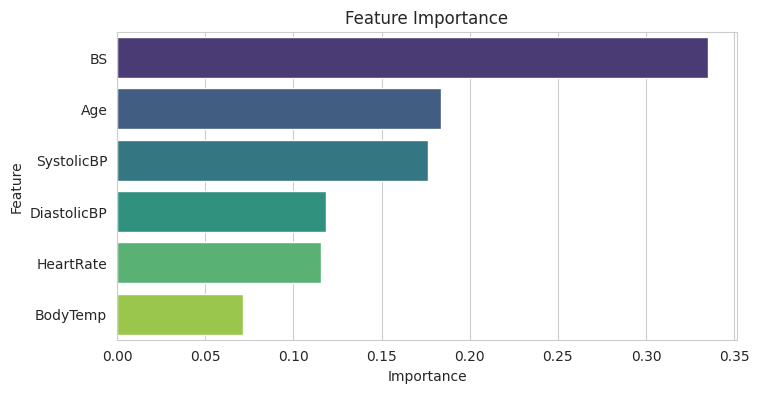

In [22]:
#@title Model 2 - Random Forrest

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'
)
# 2. Latih Model
model_rf.fit(X_train_scaled, y_train)
# 3. Prediksi
y_pred_rf = model_rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Akurasi Random Forest: {acc_rf:.4f}\n")
print("Classification Report :")
print(classification_report(y_test, y_pred_rf))

# 4. Visualisasi Feature Importance
importances = model_rf.feature_importances_
feature_names = X.columns
df_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_imp = df_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')
plt.title('Feature Importance')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mulai Training Deep Learning...
Training Selesai!


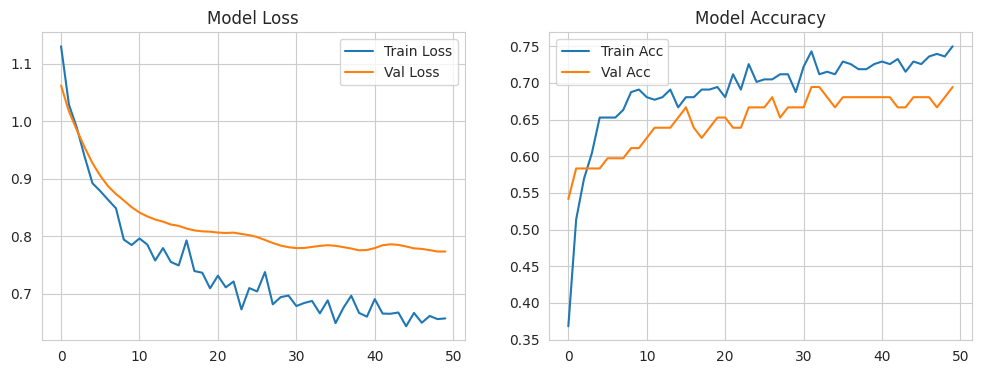

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Akurasi Deep learning MLP: 0.6923

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.96      0.80        47
           1       0.40      0.10      0.15        21
           2       0.80      0.70      0.74        23

    accuracy                           0.69        91
   macro avg       0.63      0.58      0.56        91
weighted avg       0.65      0.69      0.63        91



In [23]:
#@title Model 3 - Deep Learning (MLP)
tf.random.set_seed(42)
# 1. Definisi Arsitektur Model (MLP)
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
# 2. Compile Model
model_dl.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
# 3. Training Model
print("Mulai Training Deep Learning...")
history = model_dl.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)
print("Training Selesai!")
# 4. Plot Grafik Loss & Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()
# 5. Prediksi Data Testing
y_pred_probs = model_dl.predict(X_test_scaled)
y_pred_dl = np.argmax(y_pred_probs, axis=1)
# 6. Angka Metrik
print(f"Akurasi Deep learning MLP: {accuracy_score(y_test, y_pred_dl):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_dl))

In [24]:
#@title Evaluasi Akhir & Perbandingan

# Prediksi Deep Learning (ambil probabilitas tertinggi)
y_pred_prob = model_dl.predict(X_test_scaled)
y_pred_dl = np.argmax(y_pred_prob, axis=1)
acc_dl = accuracy_score(y_test, y_pred_dl)

# Tabel Perbandingan
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Deep Learning (MLP)'],
    'Accuracy': [acc_logreg, acc_rf, acc_dl]
})

print("\n=== HASIL AKHIR PERBANDINGAN MODEL ===")
display(comparison)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

=== HASIL AKHIR PERBANDINGAN MODEL ===


,Model,Accuracy
0,Logistic Regression,0.604396
1,Random Forest,0.648352
2,Deep Learning (MLP),0.692308


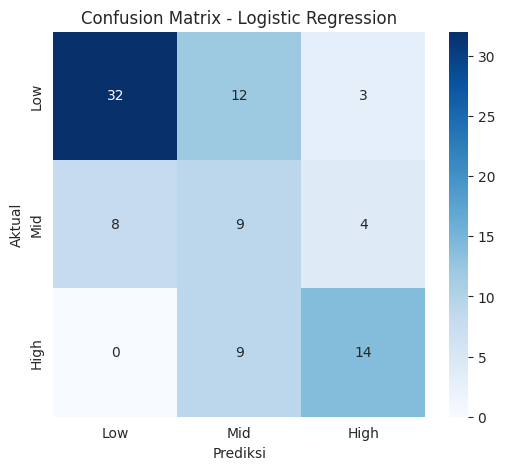

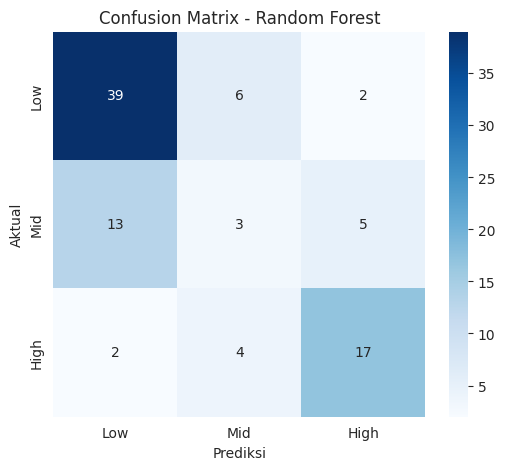

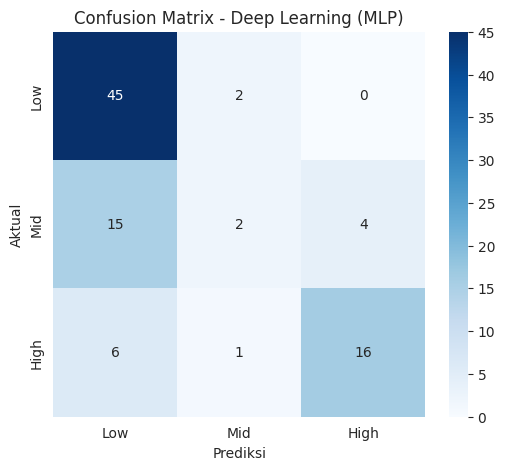

In [25]:
#@title Visualisasi Confusion Matrix

def plot_cm(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low', 'Mid', 'High'],
                yticklabels=['Low', 'Mid', 'High'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

plot_cm(y_test, y_pred_logreg, "Logistic Regression")
plot_cm(y_test, y_pred_rf, "Random Forest")
plot_cm(y_test, y_pred_dl, "Deep Learning (MLP)")

/tmp/ipython-input-2714414369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=comparison, palette='viridis')


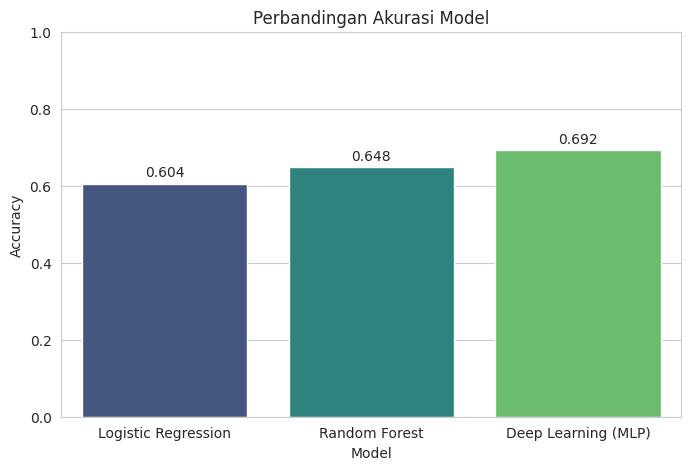

In [26]:
#@title Visualisasi Bar Chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Model', y='Accuracy', data=comparison, palette='viridis')
for i in ax.containers:
    ax.bar_label(i, fmt='%.3f', padding=3)
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1.0)
plt.show()

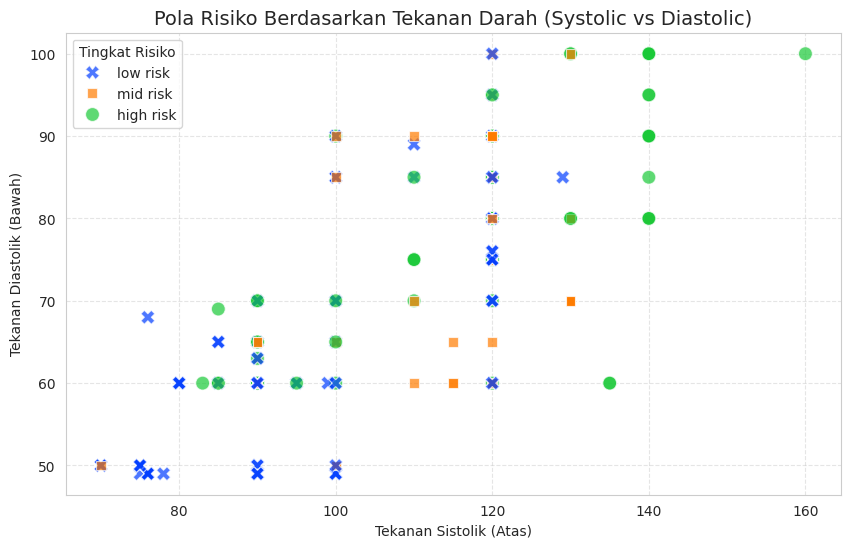

In [27]:
#@title Scatter Plot Tensi Darah
plt.figure(figsize=(10, 6))

# plot Systolic vs Diastolic
sns.scatterplot(data=df_clean, x='SystolicBP', y='DiastolicBP',
                hue='RiskLevel', style='RiskLevel',
                hue_order=['low risk', 'mid risk', 'high risk'],
                palette='bright', s=100, alpha=0.7)

plt.title('Pola Risiko Berdasarkan Tekanan Darah (Systolic vs Diastolic)', fontsize=14)
plt.xlabel('Tekanan Sistolik (Atas)')
plt.ylabel('Tekanan Diastolik (Bawah)')
plt.legend(title='Tingkat Risiko')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

/tmp/ipython-input-3312641739.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='RiskLevel', order=order_risk, palette='viridis')


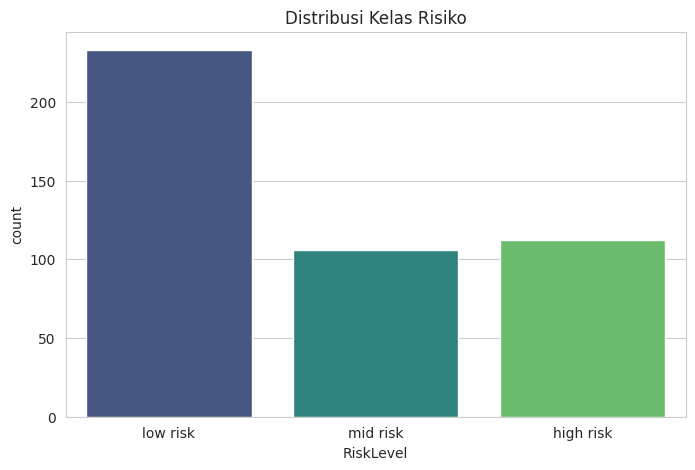

/tmp/ipython-input-3312641739.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='RiskLevel', y='BS', order=order_risk, palette='Set2')


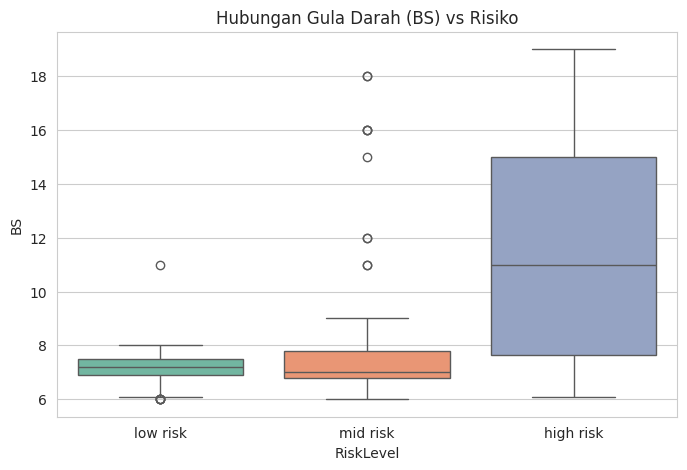

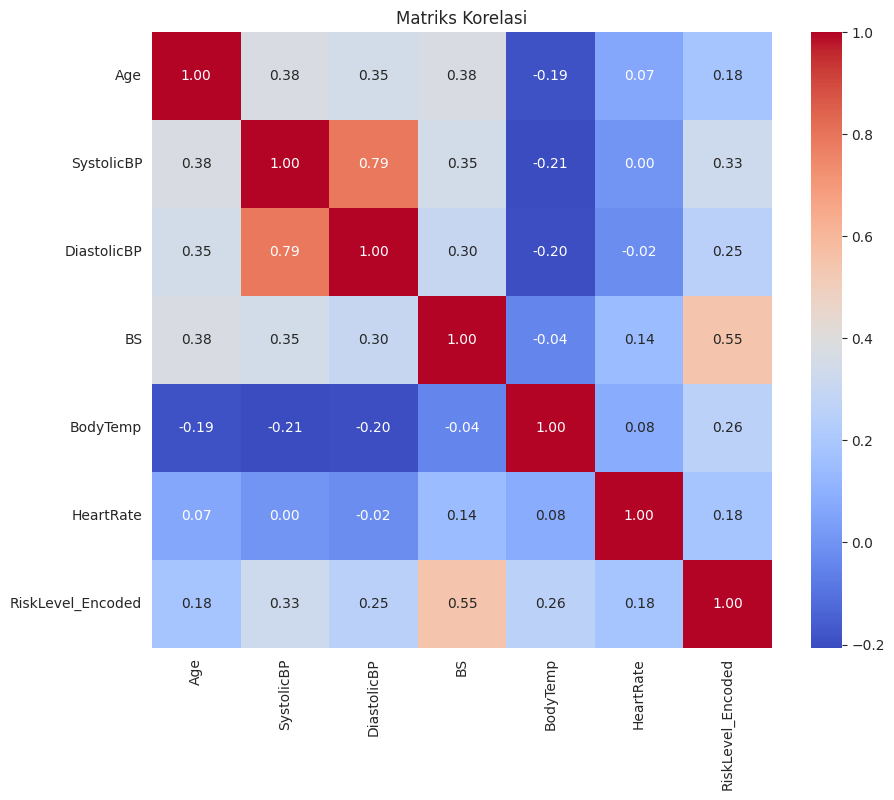

In [28]:
#@title Visualisasi EDA

order_risk = ['low risk', 'mid risk', 'high risk']

# 1. Distribusi Target
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='RiskLevel', order=order_risk, palette='viridis')
plt.title('Distribusi Kelas Risiko')
plt.show()

# 2. Boxplot Gula Darah
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='RiskLevel', y='BS', order=order_risk, palette='Set2')
plt.title('Hubungan Gula Darah (BS) vs Risiko')
plt.show()

# 3. Heatmap Korelasi
plt.figure(figsize=(10, 8))
# Pilih kolom numerik + target encoded
cols_num = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel_Encoded']
sns.heatmap(df_clean[cols_num].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

In [29]:
#@title Menampilkan Ringkasan Arsitektur Model
model_dl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,883 (30.80 KB)

 Trainable params: 2,627 (10.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,256 (20.54 KB)

In [31]:
#@title Main Libraries & Versions:
# Import dulu semua library yang mau dicek versinya
import platform
import numpy
import pandas
import sklearn
import tensorflow

# Baru cetak versinya
print(f"Python Version: {platform.python_version()}")
print(f"numpy=={numpy.__version__}")
print(f"pandas=={pandas.__version__}")
print(f"scikit-learn=={sklearn.__version__}")
print(f"tensorflow=={tensorflow.__version__}")

Python Version: 3.12.12
numpy==2.0.2
pandas==2.2.2
scikit-learn==1.6.1
tensorflow==2.19.0


In [34]:
#@title unduh models
import joblib

# 1. Model Logistic Regression (sesuai kodemu: model_logreg)
joblib.dump(model_logreg, 'logreg_model.pkl')

# 2. Model Random Forest (sesuai kodemu: model_rf)
joblib.dump(model_rf, 'rf_model.pkl')

# 3. Model Deep Learning (sesuai kodemu: model_dl)
model_dl.save('mlp_model.h5')

print("✅ Sukses simpan 3 model! Cek panel kiri untuk download.")

✅ Sukses simpan 3 model! Cek panel kiri untuk download.
